# STEP 1: IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
print(train)

{'coords': array([[  6,   5,  21,  20],
       [  6,   6,  22,  22],
       [  5,   6,  22,  23],
       ...,
       [ 17,  15, 178, 155],
       [ 17,  15, 183, 160],
       [ 20,  18, 211, 184]], dtype=uint8), 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8), 'features': array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

# STEP 2: IMAGE EXPLORATION

36

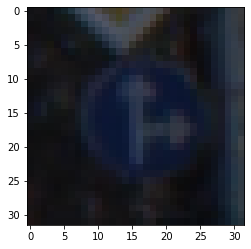

In [6]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

# STEP 3: DATA PREPARATION

In [7]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [8]:
# Convert image from color to grey
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [9]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [10]:
X_train_gray.shape

(34799, 32, 32, 1)

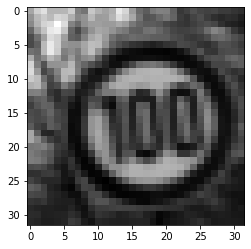

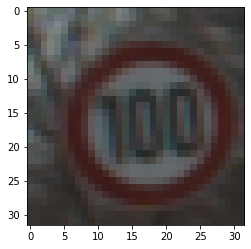

In [11]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


# STEP 4: MODEL TRAINING

In [12]:
# The depth is 6 because we have 6 kernels

## The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\e

In [14]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size= (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size= (5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))

cnn_model.add(Dense(units = 84, activation = 'relu'))

# We need output to be categorical therefore we will use softmax function
cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [15]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [16]:
history = cnn_model.fit(X_train_gray_norm, y_train, batch_size = 500, nb_epoch = 50, verbose = 1, validation_data = (X_validation_gray_norm, y_validation))

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 13s 386us/step - loss: 3.1762 - accuracy: 0.1769 - val_loss: 2.6815 - val_accuracy: 0.2943
Epoch 2/50
34799/34799 [==============================] - 11s 302us/step - loss: 1.6367 - accuracy: 0.5468 - val_loss: 1.3320 - val_accuracy: 0.6132
Epoch 3/50
34799/34799 [==============================] - 10s 299us/step - loss: 0.8890 - accuracy: 0.7481 - val_loss: 0.8896 - val_accuracy: 0.7175
Epoch 4/50
34799/34799 [==============================] - 12s 340us/step - loss: 0.6372 - accuracy: 0.8259 - val_loss: 0.7554 - val_accuracy: 0.7551
Epoch 5/50
34799/34799 [==============================] - 13s 364us/step - loss: 0.5066 - accuracy: 0.8631 - val_loss: 0.6854 - val_accuracy: 0.7932
Epoch 6/50
34799/34799 [==============================] - 13s 366us/step - loss: 0.4188 - accuracy: 0.8889 - val_loss: 0.6536 - val_accuracy: 0.7977
Epoch 7/50
34799/34799 [==============================] 

# STEP 5: MODEL EVALUATION

In [17]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy : {:.4f}'.format(score[1]))

12630/12630 [==============================] - 2s 158us/step
Test Accuracy : 0.8647


In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [20]:
history.history['accuracy']

[0.17690164,
 0.54679734,
 0.7480962,
 0.8259433,
 0.8630708,
 0.8889336,
 0.9081296,
 0.9196816,
 0.9310612,
 0.93919367,
 0.9480445,
 0.95534354,
 0.95930916,
 0.96430933,
 0.96709675,
 0.97034395,
 0.9735912,
 0.974482,
 0.9781028,
 0.9787063,
 0.98212594,
 0.982557,
 0.9837639,
 0.9853157,
 0.9854306,
 0.9863502,
 0.98632145,
 0.989425,
 0.9901434,
 0.99051696,
 0.99169517,
 0.99169517,
 0.9922124,
 0.99192506,
 0.993678,
 0.9940803,
 0.9934768,
 0.9940803,
 0.9952585,
 0.9956033,
 0.9964079,
 0.9954884,
 0.9953734,
 0.9966378,
 0.99658036,
 0.9965229,
 0.99528724,
 0.9972988,
 0.99844825,
 0.9964079]

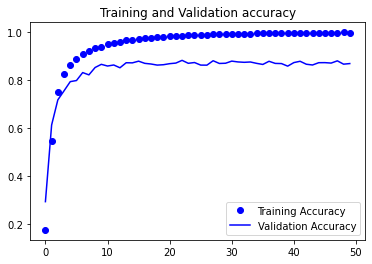

In [21]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


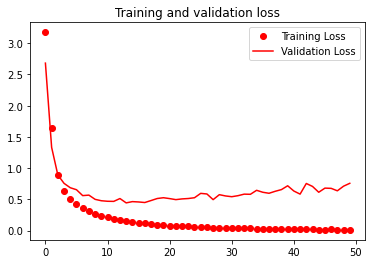

In [22]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
y_true = y_test

<AxesSubplot:>

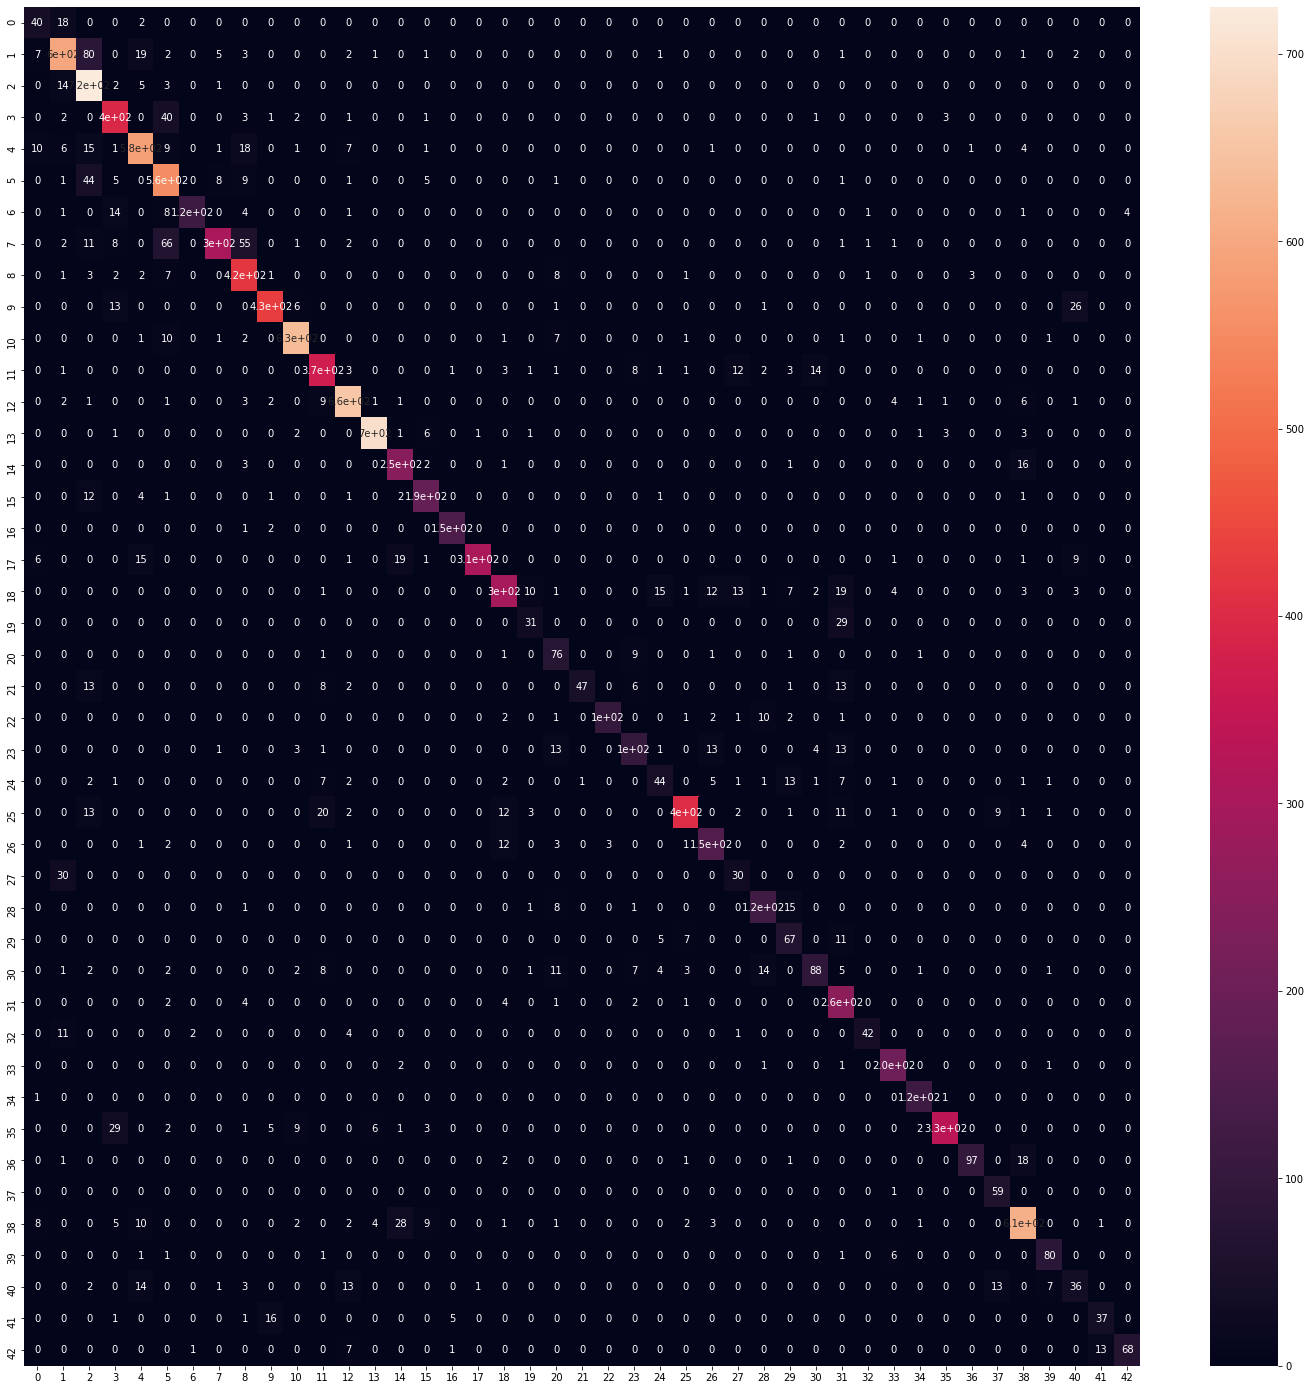

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

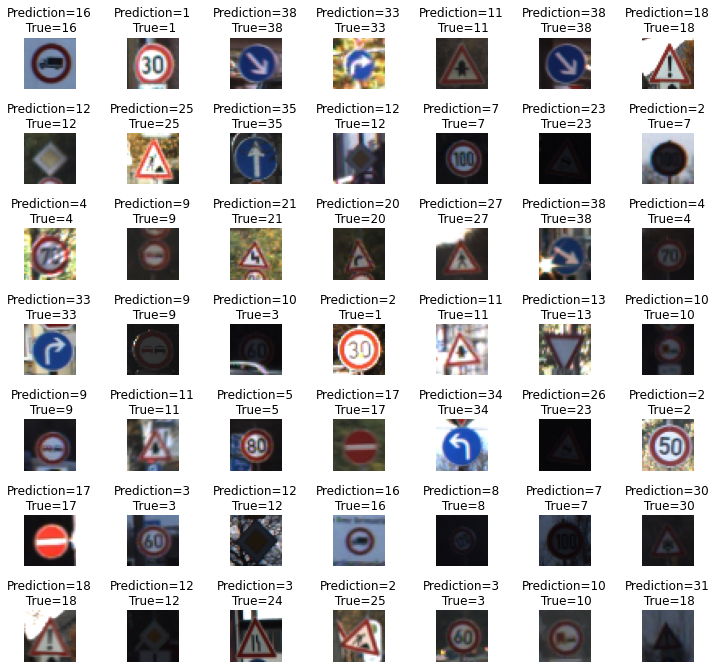

In [25]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # flatten the array

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)